<a href="https://colab.research.google.com/github/samara3823/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>


##**Approach**

1.Importing Libraries and Loading Dataset

2.Understanding the Dataset

3.Data Preprocessing

4.Understanding the Columns

5.Exploring the Dataset and Visualization

**1**.**Importing** **Libraries and Loading Dataset**.

In [ ]:
#importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the csv file
df = pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis - Samara Reddy/Hotel Bookings.csv')

**2**.**Understanding** **Dataset**

In [ ]:
#checking the shape of Dataset
df.shape


(119390, 32)

So We have total 119390 rows and 32 columns.

In [ ]:
# Basic inspection
# Viewing the top 5 rows of the Datset
df.head()



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Checking last 5 rows
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
#Checking columns name
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# understading the column property
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Columns Description:


*   hotel : Hotel(Resort Hotel or City Hotel)

*   is_canceled : Value indicating if the booking was canceled (1) or not (0)



*   lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date



* arrival_date_year : Year of arrival date



*   arrival_date_month : Month of arrival date

*   arrival_date_week_number : Week number of year for arrival date

*   arrival_date_day_of_month : Day of arrival date



*  stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

*   stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

 
*   adults : Number of adults 


*    children : Number of children




*    babies : Number of babies


*  meal : Type of meal booked. Categories are presented in standard hospitality meal packages:


*   country : Country of origin.
`

*   market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

*   distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” 

*   is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)
*  previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking 

*   previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

*   reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.



*   assigned_room_type : Code for the type of room assigned to the booking.

*   booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

*   deposit_type : Indication on if the customer made a deposit to guarantee the booking.

*   agent : ID of the travel agency that made the booking

*   company : ID of the company/entity that made the booking or responsible for paying the booking.


*  days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer


*   customer_type : Type of booking, assuming one of four categories
adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights
required_car_parking_spaces : Number of car parking spaces required by the customer
total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)

*  reservation_status : Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why

*  reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel 


  



















In [ ]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


**3. Data Preprocessing**

First, let's check for the missing values after checking for the duplicates. So, firstly we will look after the columns with the missing values. Then we will look for null value in the dataset and clean the dataset handling missing values and the null values

In [ ]:
#checking for Null Values
df.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,112593
1,agent,16340
2,country,488
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


In [ ]:
# checking for the duplicate rows
df.duplicated().value_counts()    #true means duplicate rows

False    87396
True     31994
dtype: int64

So we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

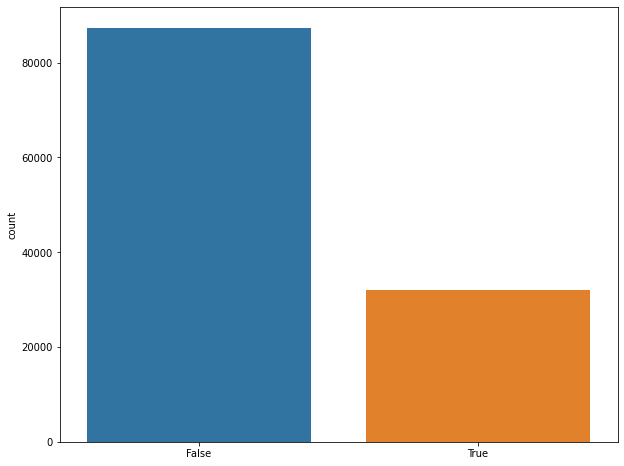

In [ ]:
# Visulizing through Count pot
plt.figure(figsize=(10,8))
sns.countplot(x=df.duplicated())

In [ ]:
#dropping the duplicate rows
df1= df.drop_duplicates()

In [ ]:
# data set reduced
df1.shape

(87396, 32)

In [ ]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  df1[col].fillna(0,inplace=True)


# Replacing NA values with 'others'
df1['country'].fillna('others',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#checking whether we handled  Null Values
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


In [ ]:
# droppping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
len(df1[df1['adults']+df1['babies']+df1['children']==0])
df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Now, our dataset is clean and ready-to-use for analysis and visualization. But, before moving towards analysis part , let us first try to estimate the reliablity of the dataset using Statistical techniques.

In [ ]:
# statistical summary of the numerical columns of the dataset
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.038565,0.030402,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.192556,0.369344,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df1.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df1[col].unique())}')

Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']


**Understanding** **about** **Features**. **Univariate Analysis**

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

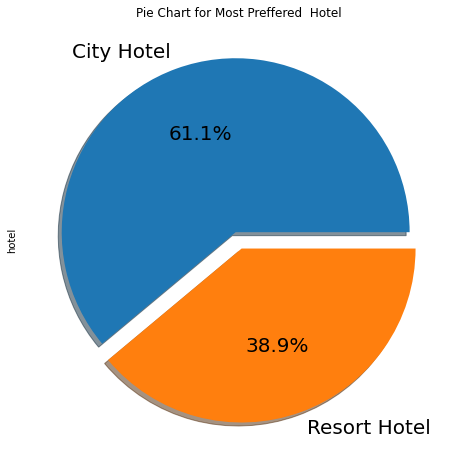

In [ ]:
#Which type of hotel is mostly prefered by the guests?
# Visualizsing the by pie chart.
df1['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

Result--
City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings.

In [ ]:
#Which Agent made the most bookings?
# return highest bookings made by agents
highest_bookings= df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Result--
Agent ID no: 9 made most of the bookings

Text(0.5, 1.0, 'Cancellation and non Cancellation')

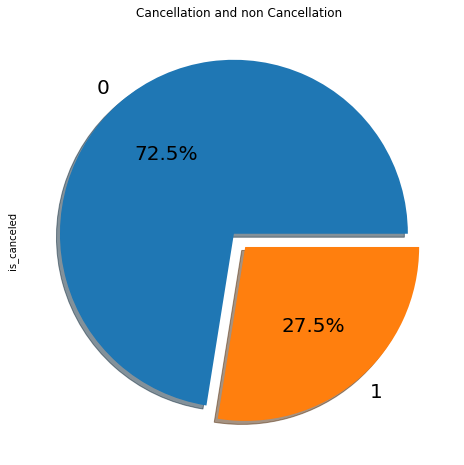

In [ ]:
#What is the pecentage of cancellation?
df1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

#Observation :
##0= not cancled
##1= canceled
##27.5 % of the bookings were cancelled.

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

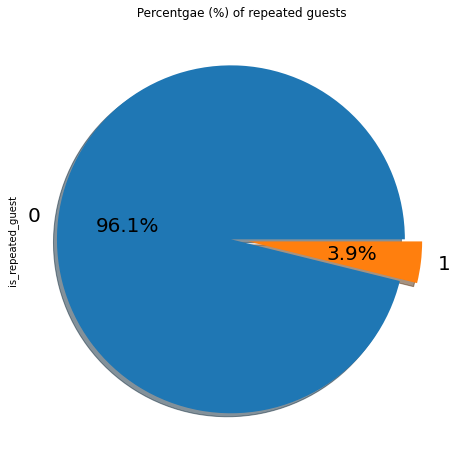

In [ ]:
#What is the Percentage of repeated guests?
df1['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentgae (%) of repeated guests")

#Observation:
##Repeated guests are very few which only 3.9 %.
##In order to retained the guests management should take feedbacks from guests and try to imporve the services.

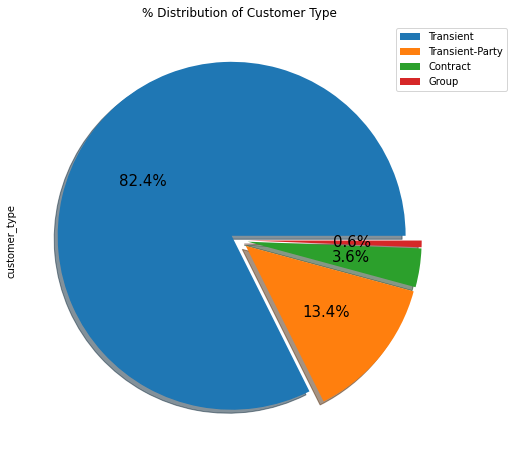

In [ ]:
#What is the percentage distribution of "Customer Type"?
df1['customer_type'].value_counts().plot.pie(explode=[0.05]*4,shadow=True,autopct='%1.1f%%',figsize=(12,8),fontsize=15,labels=None)


labels=df1['customer_type'].value_counts().index.tolist()
plt.title('% Distribution of Customer Type')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)


##Contract
##when the booking has an allotment or other type of contract associated to it
##Group
##when the booking is associated to a group
##Transient
##when the booking is not part of a group or contract, and is not associated to other transient booking
##Transient-party
##when the booking is transient, but is associated to at least other transient booking



#Observation:
##Transient customer type is more whcih is 82.4 %. percentage of Booking associated by the Group is vey low.

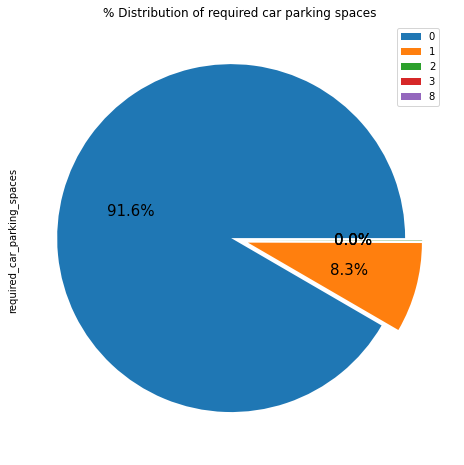

In [ ]:
#What is the percentage distribution of required_car_parking_spaces?
df1['required_car_parking_spaces'].value_counts().plot.pie(explode=[0.05]*5, autopct='%1.1f%%',shadow=False,figsize=(12,8),fontsize=15,labels=None)

labels=df1['required_car_parking_spaces'].value_counts().index
plt.title('% Distribution of required car parking spaces')
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

#Observation
##91.6 % guests did not required the parking space. only 8.3 % guests required only 1 parking space.

Text(0, 0.5, 'Percentage(%)')

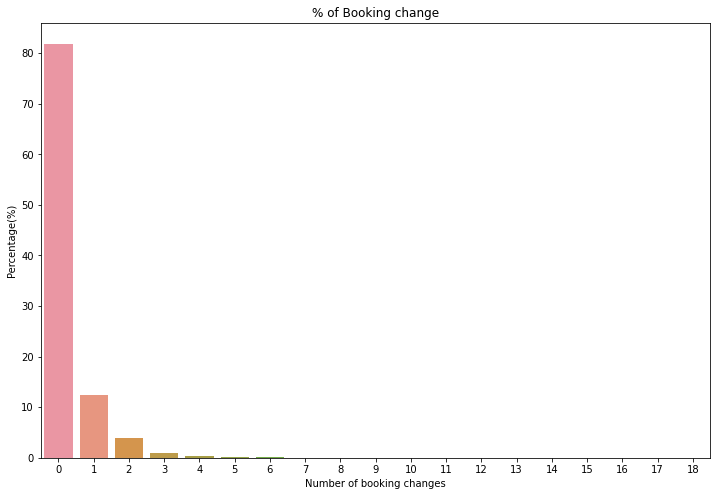

In [ ]:
#What is the percentage of booking changes made by the customer.?
booking_changes_df=df1['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df1.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

##0= 0 changes made in the booking
##1= 1 changes made in the booking
##2= 2 changes made in the booking
#Observation
##Almost 82% of the bookings were not changed by guests.

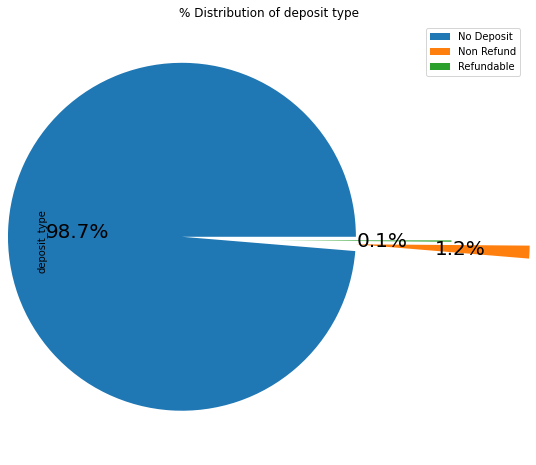

In [ ]:
#What is Percentage distribution of Deposite type ?
df1['deposit_type'].value_counts().plot.pie(explode=(0.5,0.5,0.05),autopct='%1.1f%%',shadow=False,figsize=(14,8),fontsize=20,labels=None)
plt.title("% Distribution of deposit type")
labels=df1['deposit_type'].value_counts().index.tolist()
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)

Observation--
98.7 % of the guests prefer "No deposit" type of deposit.

Text(0.5, 1.0, 'Preferred Meal Type')

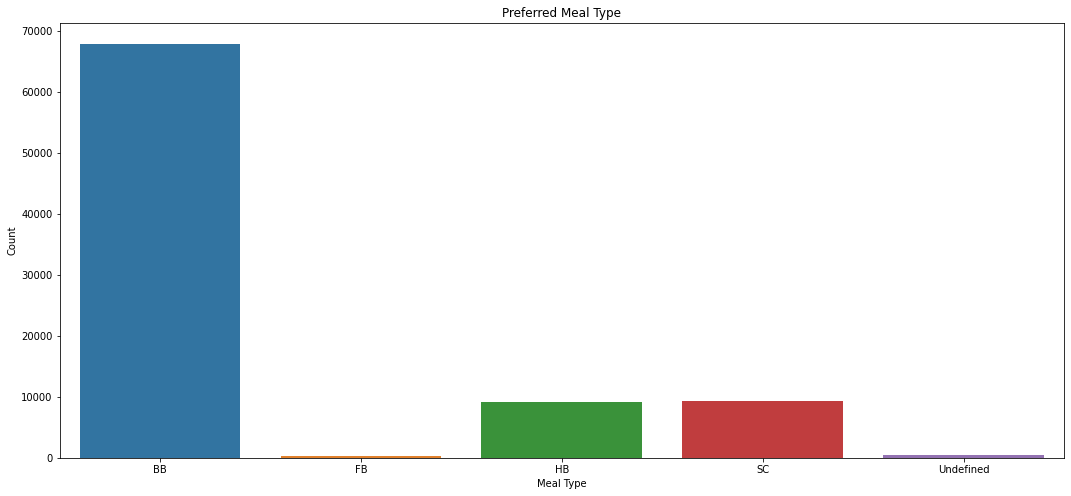

In [ ]:
#Which type of food is mostly preferred by the guests?
# df1['meal'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], autopct='%1.1f%%', shadow=True, figsize=(20,15),fontsize=20)
plt.figure(figsize=(18,8))
sns.countplot(x=df1['meal'])
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title("Preferred Meal Type")

#Types of meal in hotels:

#BB - (Bed and Breakfast)
#HB- (Half Board)
#FB- (Full Board)
#SC- (Self Catering) 
# Observation 
# So the most preferred meal type by the guests is BB( Bed and Breakfast)
#HB- (Half Board) and SC- (Self Catering) are equally preferred.

Text(0.5, 1.0, 'Number of guests from diffrent Countries')

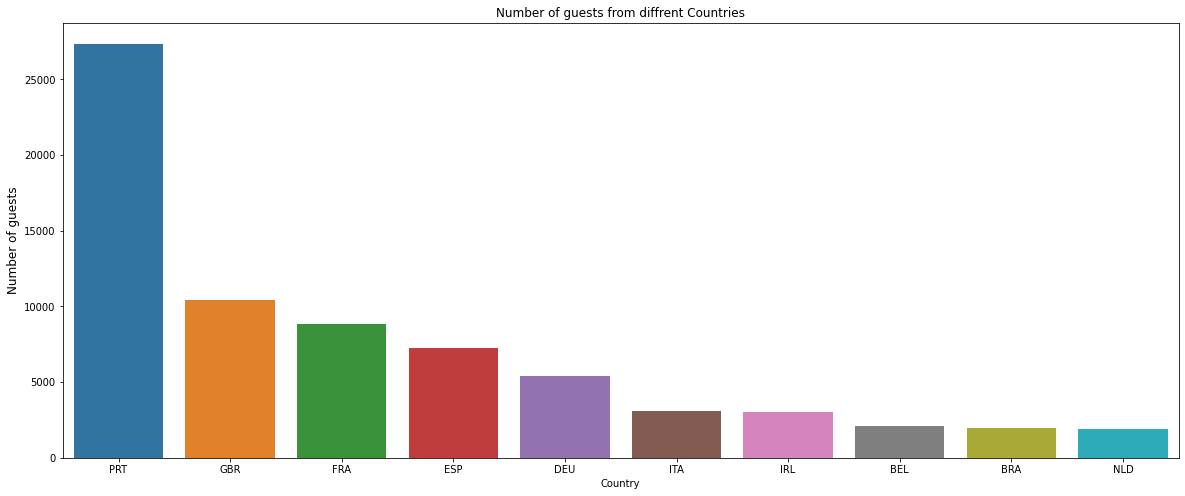

In [ ]:
#From which country the most guests are coming?
# Counting the guests from various countries.
country_df=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})[:10]
# country_df1=df1['country'].value_counts().reset_index().rename(columns={'index': 'country','country': 'count of guests'})

# Visualizing by  plotting the graph
plt.figure(figsize=(20,8))
sns.barplot(x=country_df['country'],y=country_df['count of guests'])
plt.xlabel('Country')
plt.ylabel('Number of guests',fontsize=12)
plt.title("Number of guests from diffrent Countries")

#Observation
##Most of the guests are coming from portugal i.e more 25000 guests are from portugal
##PRT- Portugal
##GBR- United Kingdom
##FRA- France
##ESP- Spain
##DEU - Germany
##ITA -Itlay
##IRL - Ireland
##BEL -Belgium
##BRA -Brazil
##NLD-Netherlands

Text(0.5, 1.0, 'Most preferred Room type')

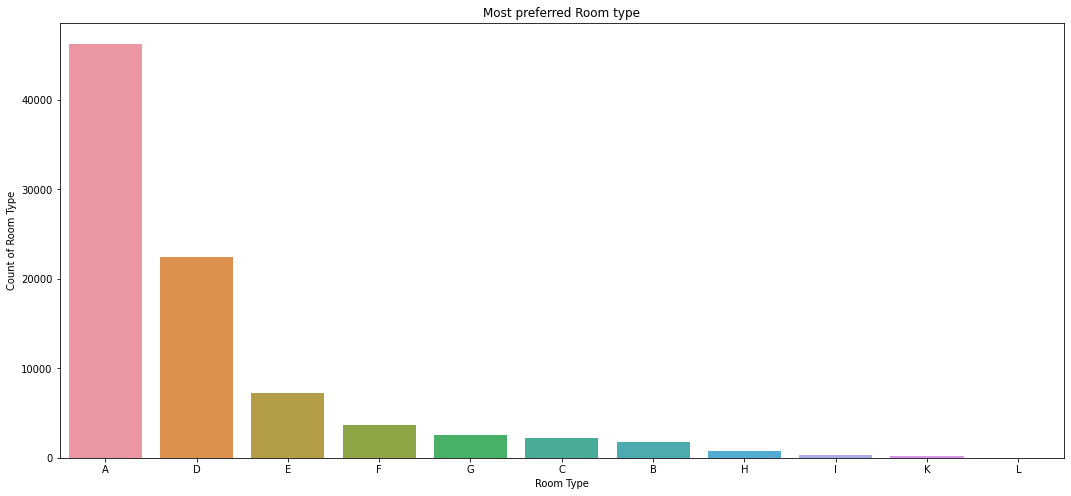

In [ ]:
#Which is the most preferred room type by the customers?
#set plotsize
plt.figure(figsize=(18,8))

#plotting 
sns.countplot(x=df1['assigned_room_type'],order=df1['assigned_room_type'].value_counts().index)
#  set xlabel for the plot
plt.xlabel('Room Type')
# set y label for the plot
plt.ylabel('Count of Room Type')
#set title for the plot
plt.title("Most preferred Room type")

Observation
So the most preferred Room type is "A".

In [ ]:
#In which month most of the bookings happened?
# groupby arrival_date_month and taking the hotel count
bookings_by_months_df=df1.groupby(['arrival_date_month'])['hotel'].count().reset_index().rename(columns={'hotel':"Counts"})
# Create list of months in order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# creating df which will map the order of above months list without changing its values.
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
# sorting by arrival_date_month
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')

bookings_by_months_df

,arrival_date_month,Counts
4,January,4685
3,February,6083
7,March,7489
0,April,7900
8,May,8344
6,June,7756
5,July,10043
1,August,11242
11,September,6682
10,October,6921


Text(0, 0.5, 'Number of bookings')

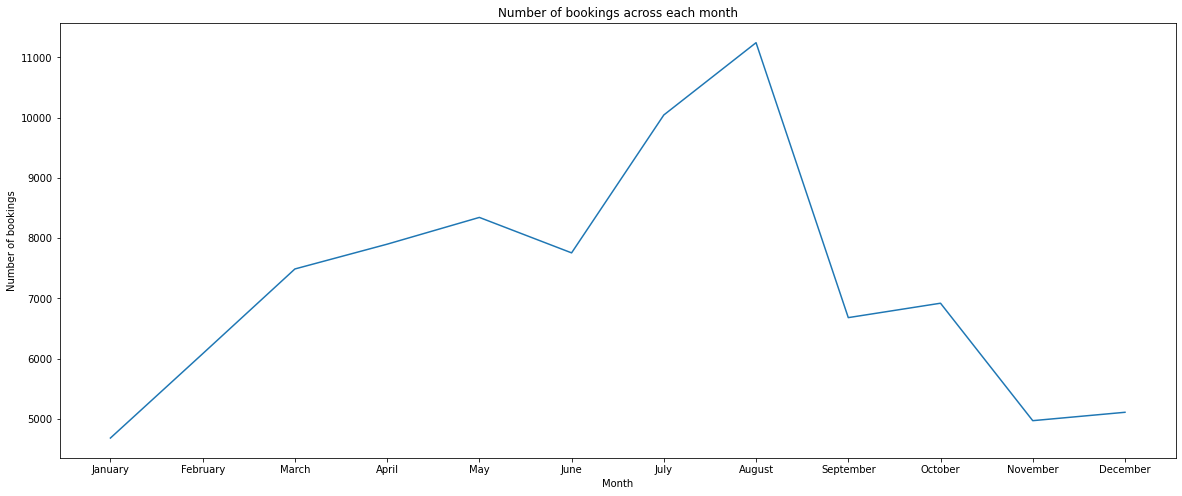

In [ ]:
## set plot size
plt.figure(figsize=(20,8))

#pltting lineplot on x- months & y- booking counts
sns.lineplot(x=bookings_by_months_df['arrival_date_month'],y=bookings_by_months_df['Counts'])

# set title for the plot
plt.title('Number of bookings across each month')
#set x label
plt.xlabel('Month')
#set y label
plt.ylabel('Number of bookings')

Observation--
July and August months had the most Bookings. Summer vaccation can be the reason for the bookings.

Text(0.5, 1.0, ' Mostly Used Distribution Channel for Hotel Bookings ')

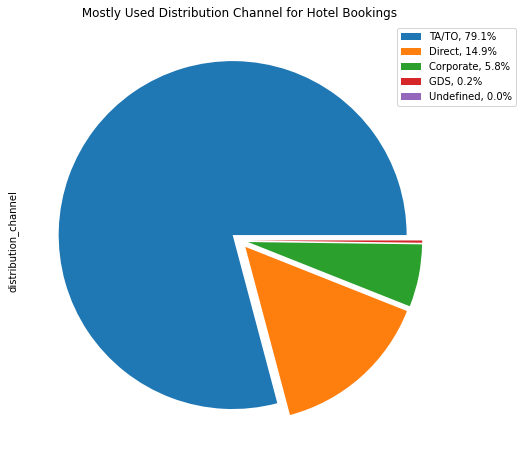

In [ ]:
#Which Distribution channel is mostly used for hotel bookings?
# Visualizsing the by pie chart.


#Creating labels
labels=df1['distribution_channel'].value_counts().index.tolist()

# creating new df of distribution channel
distribution_channel_df=df1['distribution_channel'].value_counts().reset_index().rename(columns={'index':"distribution_channel",'distribution_channel':'count'})

#adding percentage columns to the distribution_channel_df
distribution_channel_df['percentage']=round(distribution_channel_df['count']*100/df1.shape[0],1)

#Creating list of percentage
sizes=distribution_channel_df['percentage'].values.tolist()

#plotting the piw chart
df1['distribution_channel'].value_counts().plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05], shadow=False, figsize=(15,8),fontsize=10,labels=None)   

# setting legends with the percentage values
labels = [f'{l}, {s}%' for l, s in zip(labels, sizes)]
plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
plt.title(' Mostly Used Distribution Channel for Hotel Bookings ')

#Result
##'TA/TO' is mostly(79.1%) used for booking hoetls.

Text(0.5, 1.0, 'Year Wise bookings')

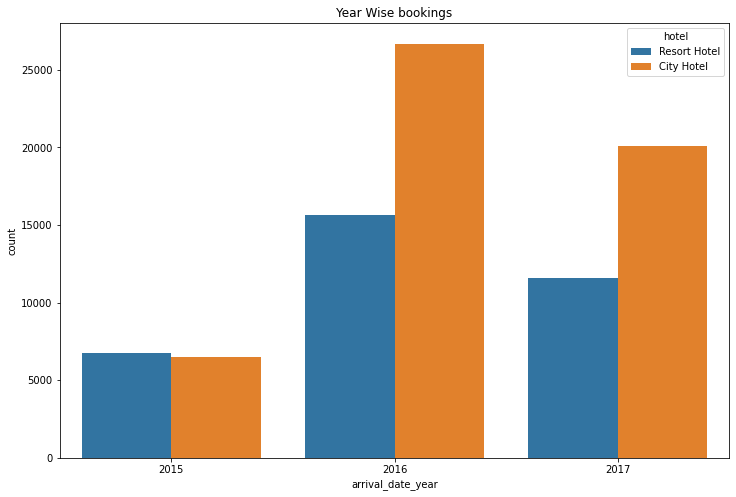

In [ ]:
#Which year had the highest bookings?
# set plot size
plt.figure(figsize=(12,8))

#  plot with countplot
sns.countplot(x=df1['arrival_date_year'],hue=df1['hotel'])
plt.title("Year Wise bookings")

#Result
##2016 had the higest bookings.
##2015 had less 7000 bookings.
##overall City hotels had the most of the bookings.

**Exploratory** **Data** **Analysis**

Checking how two columns and multiple colums are related. Bivariate and Multivariate Analysis

In [ ]:
# group by hotel
grup_by_hotel=df1.groupby('hotel')

Text(0.5, 1.0, 'Average Lead Time for each Hotel type')

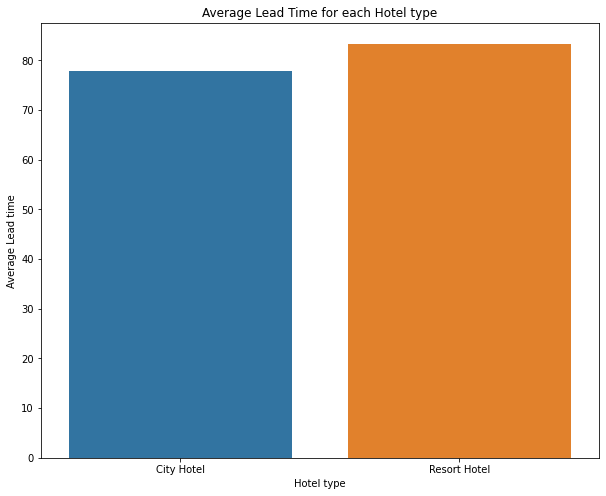

In [ ]:
#Checking Which hotel type has the more lead time?
#group by hotel and taking mean of lead time
avg_lead_time=grup_by_hotel['lead_time'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# plot the bar plot
sns.barplot(x=avg_lead_time['hotel'],y=avg_lead_time['lead_time'])
# set lables
plt.xlabel('Hotel type')
plt.ylabel('Average Lead time')
plt.title("Average Lead Time for each Hotel type")

Results--
Resort hotels has slightly high avg lead time. That means customers plan their trips very early.

Text(0.5, 1.0, 'Percentage of booking cancellation')

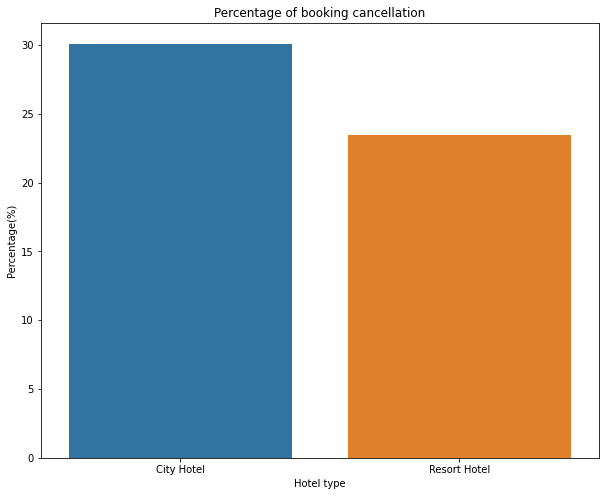

In [ ]:
# Checking Which hotel has highest percentage of booking cancellation?
# booking canceled=1 
# booking not canceled= 0

# creating new DataFrame where bookings are cancelled.
canceled_df=df1[df1['is_canceled']==1]

# Grouping by hotel
canceled_df=canceled_df.groupby('hotel').size().reset_index().rename(columns={0: "no_of_cancelled_bookings"})

# adding 'total booking column for calculating the percentage.
canceled_df['total_booikngs']=df1.groupby('hotel').size().reset_index().rename(columns={0:"total_bookings"}).drop('hotel',axis=1)
canceled_df

#plotting the barchat
plt.figure(figsize=(10,8))
sns.barplot(x=canceled_df['hotel'],y=canceled_df['no_of_cancelled_bookings']*100/canceled_df['total_booikngs'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('Percentage(%)')
plt.title("Percentage of booking cancellation")

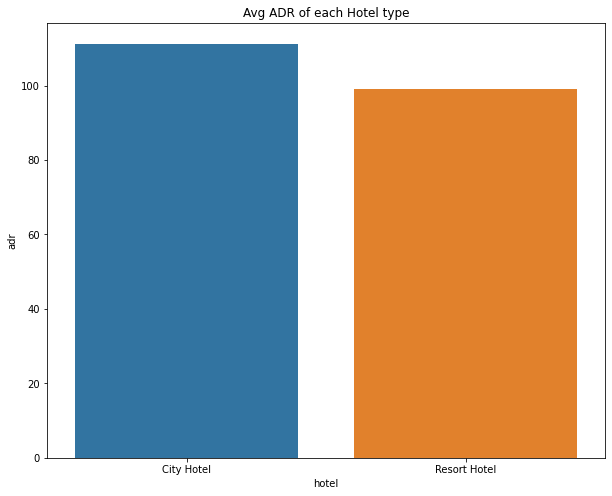

In [ ]:
#Which Hotel type has the highest ADR?
#grouping by hotel adr
highest_adr=grup_by_hotel['adr'].mean().reset_index()

#set plot size
plt.figure(figsize=(10,8))

# set labels
plt.xlabel('Hotel type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

#plot the graph
sns.barplot(x=highest_adr['hotel'],y=highest_adr['adr'])

Result--
City hotel has the highest ADR. That means city hotels are generating more revenues than the resort hotels. More the ADR more is the revenue.

Text(0.5, 1.0, 'Waiting time for each hotel type')

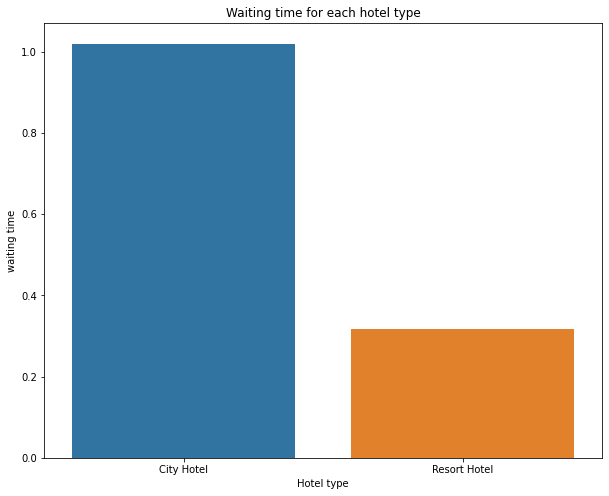

In [ ]:
#Which hotel has longer waiting time?
#groupping by hoetl and takin mean of days in waiting list
waiting_time_df=df1.groupby('hotel')['days_in_waiting_list'].mean().reset_index()
# waiting_time_df

#set the plot size
plt.figure(figsize=(10,8))

# plot barchart
sns.barplot(x=waiting_time_df['hotel'],y=waiting_time_df['days_in_waiting_list'])

#set labels
plt.xlabel('Hotel type')
plt.ylabel('waiting time')
plt.title("Waiting time for each hotel type")

Results--
So the City Hotels has longer waiting period than the Resort Hotels. Thus we can say that City Hotels are much busier than the Resort Hotels

Text(0.5, 1.0, 'Most repeated guests for each hotel')

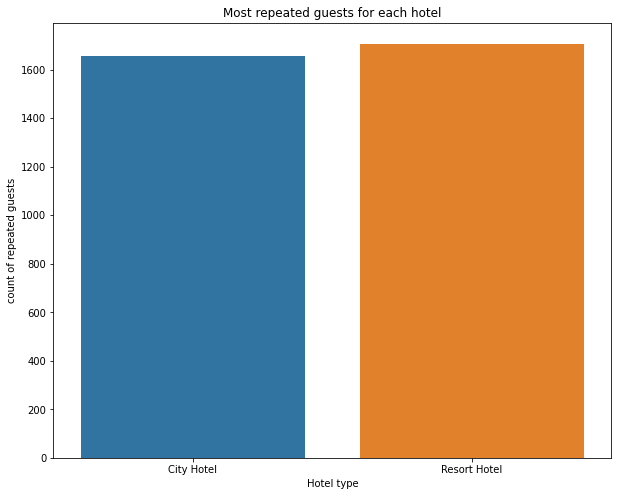

In [ ]:
#Which Hotels has the most repeated guests?
# repeated guest=1
#not repeated guest=0
#groupby hotel
repeated_guests_df=df1[df1['is_repeated_guest']==1].groupby('hotel').size().reset_index().rename(columns={0:'number_of_repated_guests'})



#set plot size adn plot barplot
plt.figure(figsize=(10,8))
sns.barplot(x=repeated_guests_df['hotel'],y=repeated_guests_df['number_of_repated_guests'])

# set labels
plt.xlabel('Hotel type')
plt.ylabel('count of repeated guests')
plt.title("Most repeated guests for each hotel")

Results--
Resort Hotel has slightly more repeated guests than the City Hotels. It is almost similar for both hotels.

In [ ]:
# Checking ADR across the different month.

#groupby
bookings_by_months_df=df1.groupby(['arrival_date_month','hotel'])['adr'].mean().reset_index()
#create month list
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# it will take the order of the month list in the df along with values
bookings_by_months_df['arrival_date_month']=pd.Categorical(bookings_by_months_df['arrival_date_month'],categories=months,ordered=True)
#sortting
bookings_by_months_df=bookings_by_months_df.sort_values('arrival_date_month')
bookings_by_months_df

,arrival_date_month,hotel,adr
8,January,City Hotel,85.269875
9,January,Resort Hotel,49.181693
6,February,City Hotel,89.266427
7,February,Resort Hotel,54.102809
15,March,Resort Hotel,57.590889
14,March,City Hotel,95.193911
0,April,City Hotel,117.314134
1,April,Resort Hotel,79.283805
17,May,Resort Hotel,80.551101
16,May,City Hotel,128.055724


Text(0.5, 1.0, 'ADR across Distribution channel')

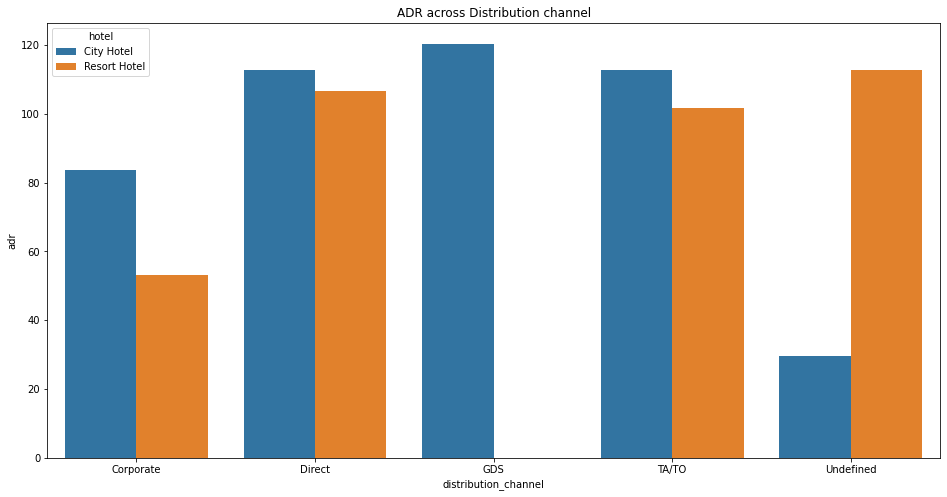

In [ ]:
#Which distribution channel contributed more to adr in order to increase the the income.?
# group by distribution channel and hotel
distribution_channel_df=df1.groupby(['distribution_channel','hotel'])['adr'].mean().reset_index()

# set plot size and plot barchart
plt.figure(figsize=(16,8))
sns.barplot(x='distribution_channel', y='adr', data=distribution_channel_df, hue='hotel')
plt.title('ADR across Distribution channel')



*   Corporate- These are corporate hotel booing companies which makes bookings possible.


*   GDS-A GDS is a worldwide conduit between travel bookers and suppliers, such as hotels and other accommodation providers. It communicates live product, price and availability data to travel agents and online booking engines, and allows for automated transactions.
*   Direct- means that bookings are directly made with the respective hotels


*   TA/TO- means that booings are made through travel agents or travel operators.

*   Undefined- Bookings are undefined. may be customers made their bookings on arrival.






Text(0.5, 1.0, 'Cancellation Rate Vs Distribution channel')

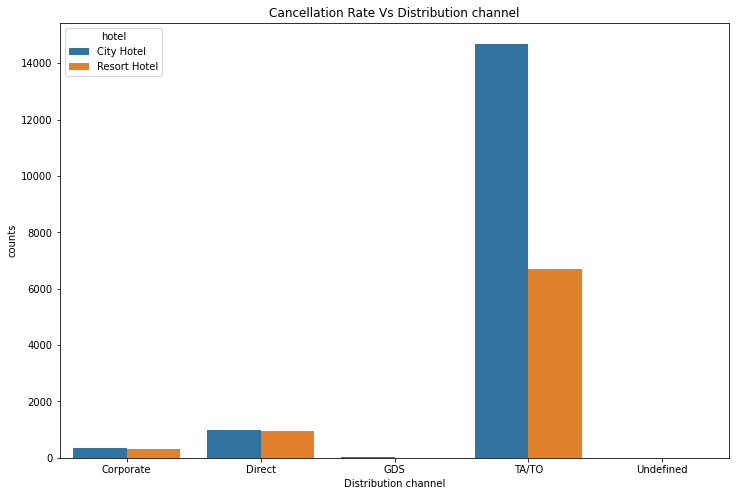

In [45]:
#Which distribution channel has the higest cancellation rate?
canceled_df=df1[df1['is_canceled']==1] # 1= canceled

#group by distribution channel
canceled_df=canceled_df.groupby(['distribution_channel','hotel']).size().reset_index().rename(columns={0:'Counts'})
# canceled_df['Percentage']=canceled_df['Counts']*100/df1[df1['is_canceled']==1][0]
canceled_df

#set plot size and plot barchart 
plt.figure(figsize=(12,8))
sns.barplot(x='distribution_channel',y='Counts',hue="hotel",data=canceled_df)

# set labels
plt.xlabel('Distribution channel')
plt.ylabel('counts')
plt.title('Cancellation Rate Vs Distribution channel')

#Results
##In "TA/TO", City hotels has the high cancellation rate compared to resort hotels
##In "direct" both the hotels has almost same cancellation rate.

In [47]:
#Which Market Segment has the higest cancellation rate?
market_segment_df=df1[df1['is_canceled']==1]   # canceled=1
market_segment_df
market_segment_df=market_segment_df.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0:'counts'})   # group by

market_segment_df

,market_segment,hotel,counts
0,Aviation,City Hotel,45
1,Complementary,City Hotel,54
2,Complementary,Resort Hotel,31
3,Corporate,City Hotel,263
4,Corporate,Resort Hotel,246
5,Direct,City Hotel,912
6,Direct,Resort Hotel,825
7,Groups,City Hotel,887
8,Groups,Resort Hotel,445
9,Offline TA/TO,City Hotel,1257


#Results
##'Online T/A' has the highest cancellation in both type of cities
##In order to reduce the booking cancellations hotels need to set the refundable/ no refundable and deposit policies policies

In [48]:
#Does the guests alloted with the same room type which was reserved by them?
# Define a function for the reserved room type is same  or not as  assigned room type
def same_room_allotment(x):
  '''function to check whether the reserved room 
  type is same  or not as  assigned room type'''

  if x['reserved_room_type'] != x['assigned_room_type']:
    return 1
  else:
    return 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


([<matplotlib.axis.XTick at 0x7fe6527ff610>,
 [Text(0, 0, 'Not canceled'), Text(0, 0, 'canceled')])

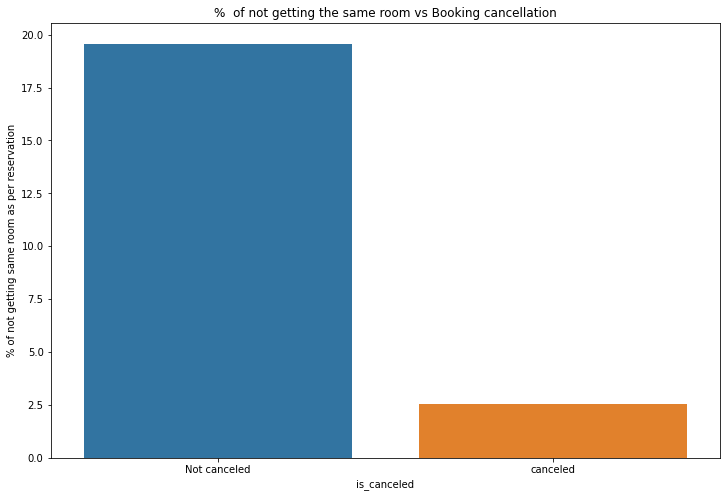

In [49]:
# create new column to df1
df1['Same_room_alloted_or_not']=df1.apply(lambda x: same_room_allotment(x),axis=1)

#groupby is canceled
grp_by_canceled_df=df1.groupby('is_canceled')

# create DF and calculate  percentage of same room alloted  or not
DF=pd.DataFrame(grp_by_canceled_df['Same_room_alloted_or_not'].sum()*100/grp_by_canceled_df.size()).rename(columns={0:"percentage"})
DF

#set plot size and plot barchart
plt.figure(figsize=(12,8))
sns.barplot(x=DF.index,y=DF['percentage'])

# set labels
plt.title('%  of not getting the same room vs Booking cancellation')
plt.xlabel('is_canceled')
plt.ylabel('% of not getting same room as per reservation')
plt.xticks([0,1],['Not canceled','canceled'])

#Results
##Its is clear that there is no much(2.5%) effect on cancellation of the bookings even if the guests are not assigned with rooms which they reserved during booking.

Text(0.5, 1.0, 'Adr across market segment')

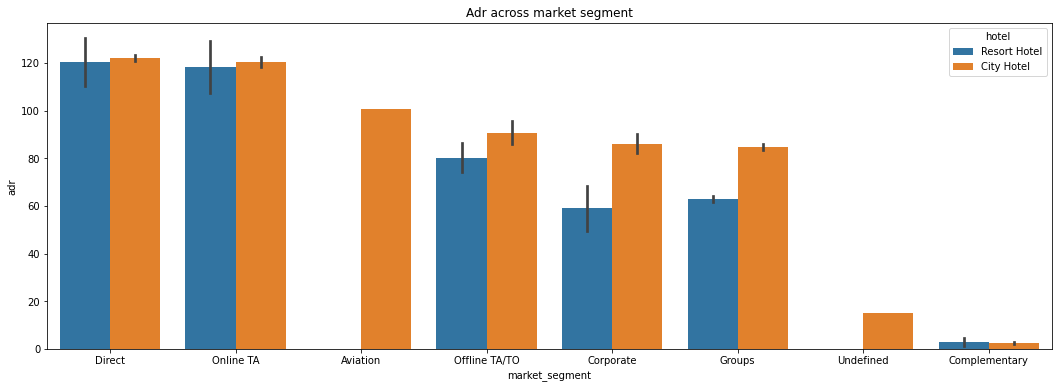

In [50]:
#ADR across different market segment
Grupby=df1.groupby(['market_segment','hotel','is_canceled'])['adr'].mean().reset_index()   # group by

# set plot size and plto barchart
plt.figure(figsize=(18,6))
sns.barplot(x='market_segment',y='adr',hue='hotel',data=Grupby.sort_values(by='adr',ascending=False))
plt.title('Adr across market segment')

#Obseravtion
##'Direct' and 'Online TA' are contributing the most in both types of hotels.
##Aviation segment should focus on increasing the bookings of 'City Hotel'

Text(0.5, 1.0, 'Correlation of the columns')

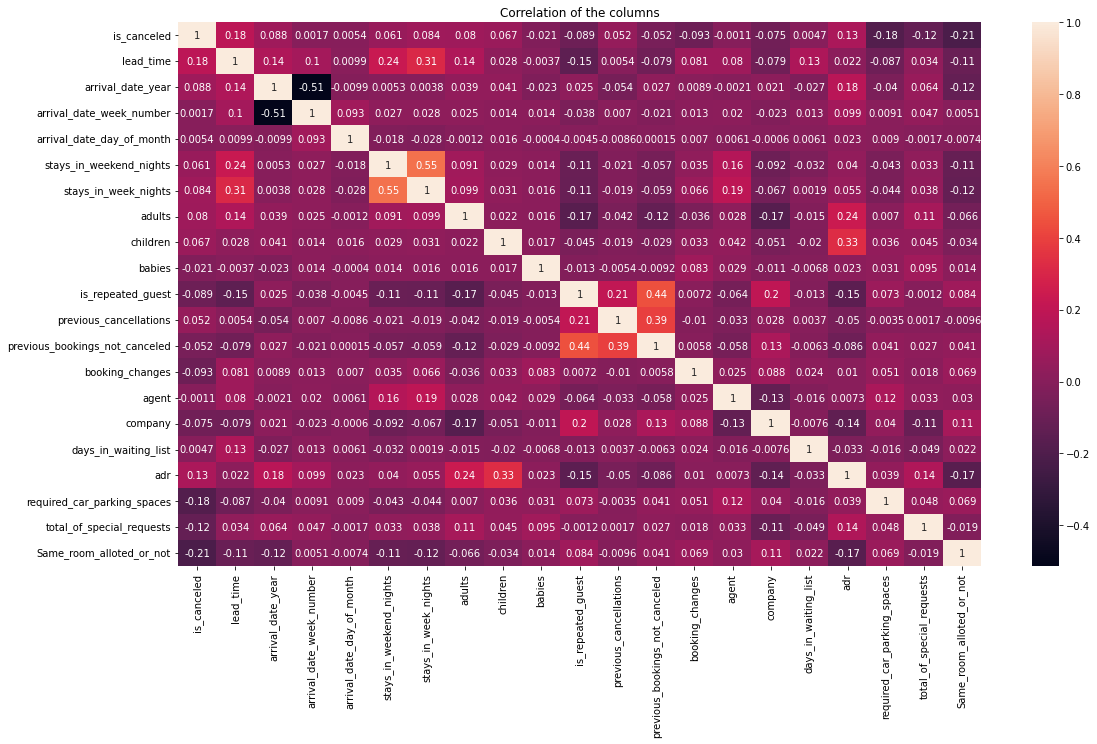

In [55]:
#Correlation of the columns
plt.figure(figsize=(18,10))
sns.heatmap(df1.corr(),annot=True)
plt.title('Correlation of the columns')

##is_canceled and same_room_alloted_or_not are negatively corelated. That means customer is unlikely to cancel his bookings if he don't get the same room as per reserved room. We have visualized it above.
##lead_time and total_stay is positively corelated.That means more is the stay of cutsomer more will be the lead time.
##adults,childrens and babies are corelated to each other. That means more the people more will be adr.
##is_repeated guest and previous bookings not canceled has strong corelation. may be repeated guests are not more likely to cancel their bookings.

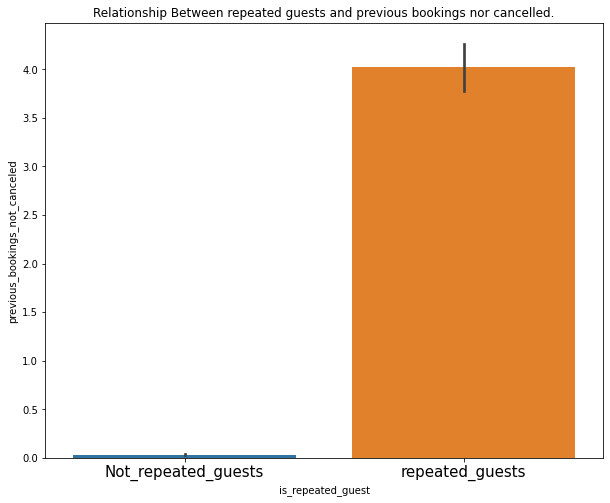

In [57]:
#Relationship between the repeated guests and previous bookings not canceled.?
repeated_guests_df=df1[df1['is_repeated_guest']==1]
repeated_guests_df_1=df1[df1['is_repeated_guest']==0]
plt.figure(figsize=(10,8))
sns.barplot(x=df1['is_repeated_guest'],y= df1['previous_bookings_not_canceled'])
plt.xticks([0,1],['Not_repeated_guests','repeated_guests'],fontsize=15)
plt.title('Relationship Between repeated guests and previous bookings nor cancelled.')
plt.show()


#Results
##Not Repeated guests are more likely to cancel their bookings.

#Final Results
##City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.
##27.5 % bookings were got cancelled out of all the bookings.
##Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.
##The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.
##Most of the customers (91.6%) do not require car parking spaces.
##79.1 % bookings were made through TA/TO (travel agents/Tour operators).
##BB( Bed & Breakfast) is the most preferred type of meal by the guests.
##Maximum number of guests were from Portugal, i.e. more than 25000 guests.
##Most of the bookings for City hotels and Resort hotel were happened in 2016.
##Average ADR for city hotel is high as compared to resort hotels. These City hotels are generating more revenue than the resort hotels.
##Booking cancellation rate is high for City hotels which almost 30 %.
##Average lead time for resort hotel is high.
##Waiting time period for City hotel is high as compared to resort hotels. That means city hotels are much busier than Resort hotels.
##Resort hotels have the most repeated guests.
##Optimal stay in both the type hotel is less than 7 days. Usually people stay for a week.
##Almost 19 % people did not cancel their bookings even after not getting the same room which they reserved while booking hotel. Only 2.5 % people cancelled the booking.